In [24]:
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

wind_name = "wind_bench"
wind_version = 1


# authenticate
credential = DefaultAzureCredential()

# Get a handle to the workspace
ml_client = MLClient(
    credential=credential,
    subscription_id="8a889cf2-7b3d-4003-824e-b503f56604b0",
    resource_group_name="rg-jef-ml",
    workspace_name="ml-gpu",
)


# update the 'my_path' variable to match the location of where you downloaded the data on your
# local filesystem

## create data asset if it doesn't already exist:
data_asset = ml_client.data.get(name=wind_name, version=wind_version)
print(
    f"Data asset already exists. Name: {data_asset.path}, version: {data_asset.version}"
)

parquet_file = data_asset.path

Data asset already exists. Name: azureml://subscriptions/8a889cf2-7b3d-4003-824e-b503f56604b0/resourcegroups/rg-jef-ml/workspaces/ml-gpu/datastores/workspaceblobstore/paths/UI/2023-11-29_114659_UTC/wind_bench.parquet/, version: 1


In [2]:

wind_columns = [
    "id",
    "Free wind speed Vx pos    0.00,   0.00,-150.00",
    "Free wind speed Vy pos    0.00,   0.00,-150.00",
    "Free wind speed Vz pos    0.00,   0.00,-150.00"
]

In [3]:
import pandas as pd

parquet_file = "/R11-data/mpu/dataset/10000_1200/wind_bench.parquet"

df = pd.read_parquet(parquet_file, columns=wind_columns)
df.head()

,id,"Free wind speed Vx pos 0.00, 0.00,-150.00","Free wind speed Vy pos 0.00, 0.00,-150.00","Free wind speed Vz pos 0.00, 0.00,-150.00"
Time,,,,
0 days 00:00:00.010000,Exp0.0,-2.620633,12.525642,1.146131
0 days 00:00:00.060000,Exp0.0,-2.619820,12.560104,1.137158
0 days 00:00:00.110000,Exp0.0,-2.643632,12.587269,1.160032
0 days 00:00:00.160000,Exp0.0,-2.664223,12.610653,1.174411
0 days 00:00:00.210000,Exp0.0,-2.681139,12.631664,1.183485


In [4]:
series = {k: v for k, v in df.groupby('id')}

print(len(series))
print(series.keys())

/tmp/ipykernel_7142/4172911144.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  series = {k: v for k, v in df.groupby('id')}


10000
dict_keys(['Exp0.0', 'Exp0.1', 'Exp0.2', 'Exp0.3', 'Exp0.4', 'Exp0.5', 'Exp0.6', 'Exp0.7', 'Exp0.8', 'Exp0.9', 'Exp1.0', 'Exp1.1', 'Exp1.2', 'Exp1.3', 'Exp1.4', 'Exp1.5', 'Exp1.6', 'Exp1.7', 'Exp1.8', 'Exp1.9', 'Exp10.0', 'Exp10.1', 'Exp10.2', 'Exp10.3', 'Exp10.4', 'Exp10.5', 'Exp10.6', 'Exp10.7', 'Exp10.8', 'Exp10.9', 'Exp100.0', 'Exp100.1', 'Exp100.2', 'Exp100.3', 'Exp100.4', 'Exp100.5', 'Exp100.6', 'Exp100.7', 'Exp100.8', 'Exp100.9', 'Exp101.0', 'Exp101.1', 'Exp101.2', 'Exp101.3', 'Exp101.4', 'Exp101.5', 'Exp101.6', 'Exp101.7', 'Exp101.8', 'Exp101.9', 'Exp102.0', 'Exp102.1', 'Exp102.2', 'Exp102.3', 'Exp102.4', 'Exp102.5', 'Exp102.6', 'Exp102.7', 'Exp102.8', 'Exp102.9', 'Exp103.0', 'Exp103.1', 'Exp103.2', 'Exp103.3', 'Exp103.4', 'Exp103.5', 'Exp103.6', 'Exp103.7', 'Exp103.8', 'Exp103.9', 'Exp104.0', 'Exp104.1', 'Exp104.2', 'Exp104.3', 'Exp104.4', 'Exp104.5', 'Exp104.6', 'Exp104.7', 'Exp104.8', 'Exp104.9', 'Exp105.0', 'Exp105.1', 'Exp105.2', 'Exp105.3', 'Exp105.4', 'Exp105.5', '

count    1200.000000
mean       12.730860
std         1.089897
min        10.208934
25%        11.846689
50%        12.982022
75%        13.612059
max        14.876385
Name: Free wind speed Vy pos    0.00,   0.00,-150.00, dtype: float64


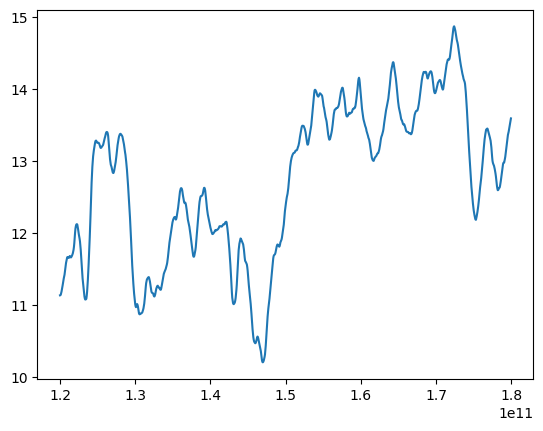

In [6]:
import matplotlib.pyplot as plt

idx = "2.2"
w_serie = series[f'Exp{idx}'].loc[:, wind_columns[2]]
plt.plot(w_serie)
print(w_serie.describe())

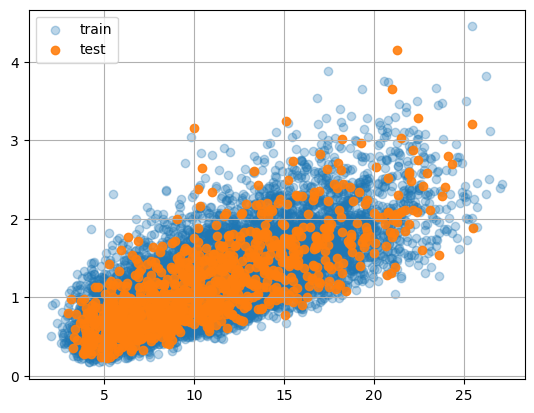

In [8]:
import matplotlib.pyplot as plt

import numpy as np
train_w_mean = []
train_w_std = []
test_w_mean = []
test_w_std = []
train_test_ratio = 0.9
for i, item in enumerate(series.items()):
    k, v = item 
    wf = v.loc[:, wind_columns[2]].to_numpy()
    if i < int(train_test_ratio*len(series)):
        train_w_mean.append(np.mean(wf))
        train_w_std.append(np.std(wf))
    else:
        test_w_mean.append(np.mean(wf))
        test_w_std.append(np.std(wf))

fig, ax = plt.subplots()
ax.scatter(train_w_mean, train_w_std, label='train', alpha=.3 )
ax.scatter(test_w_mean, test_w_std, label='test', alpha=.9)
ax.legend()
ax.grid(True)
